In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Ignore warnings to clean up output cells
simplefilter("ignore")

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc("axes", 
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14, 
       titlepad=10,
      )
plot_params = dict(color="0.75",
       style='.-',
       markeredgecolor="0.25",
       markerfacecolor="0.25",
       legend="False",
      )
%config InlineBackend.figure_format = 'retina'

In [4]:
tunnel = pd.read_csv("tunnel.csv", parse_dates=["Day"])

# Set the index to date column
tunnel = tunnel.set_index("Day") 

# Use PeriodIndex instead of Timestamp(np.datetime64)
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


#### Time-step feature

In [5]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


#### Model

In [6]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']] # teatures
y = df.loc[:, 'NumVehicles'] # target

# Train model
model = LinearRegression()
model.fit(X, y)

# Use same index for fitted values
y_pred = pd.Series(model.predict(X), index=X.index)

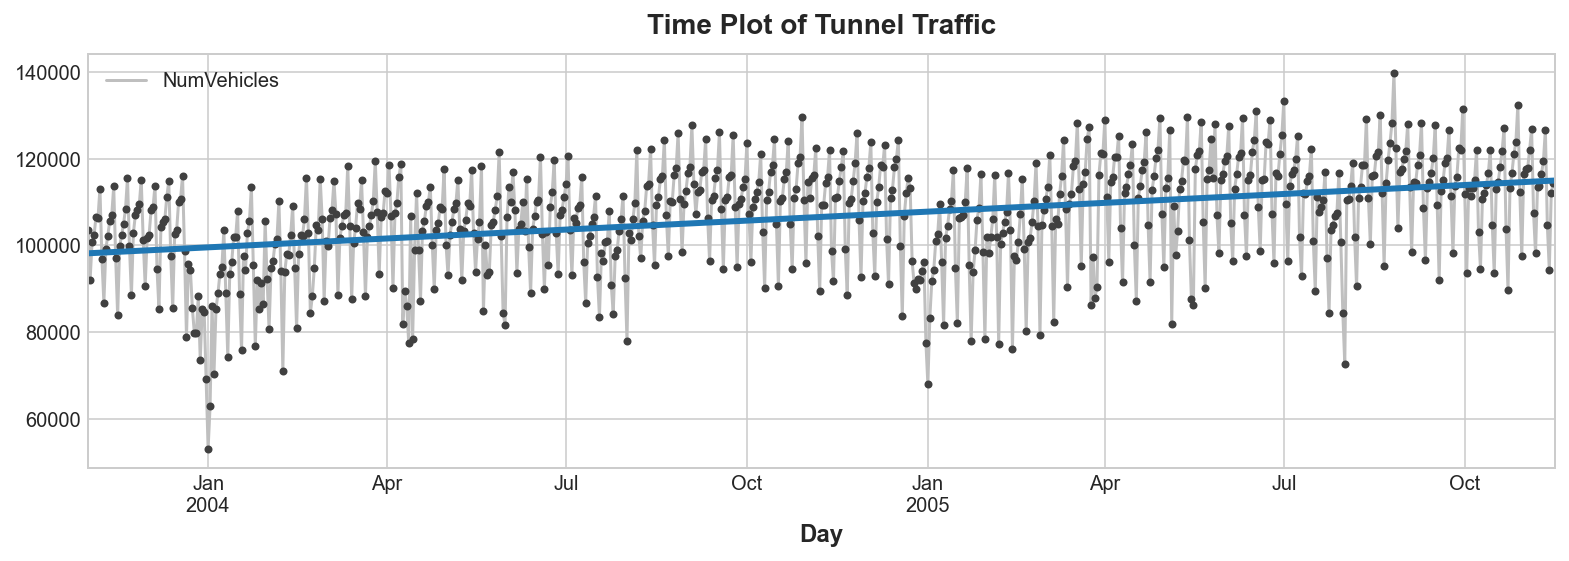

In [7]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

#### Lag feature

In [8]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [9]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

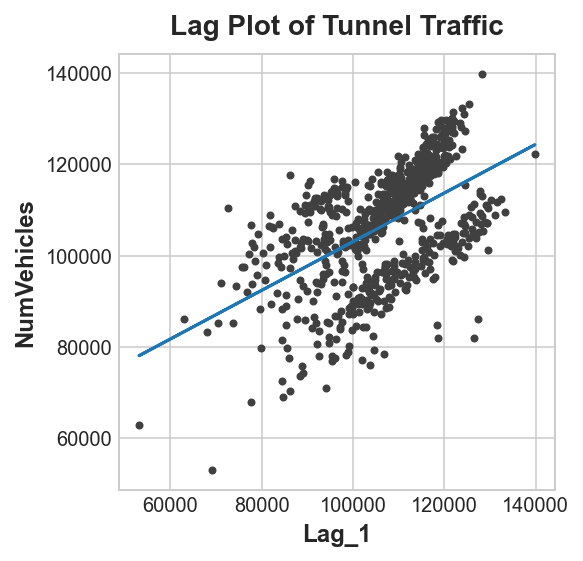

In [10]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

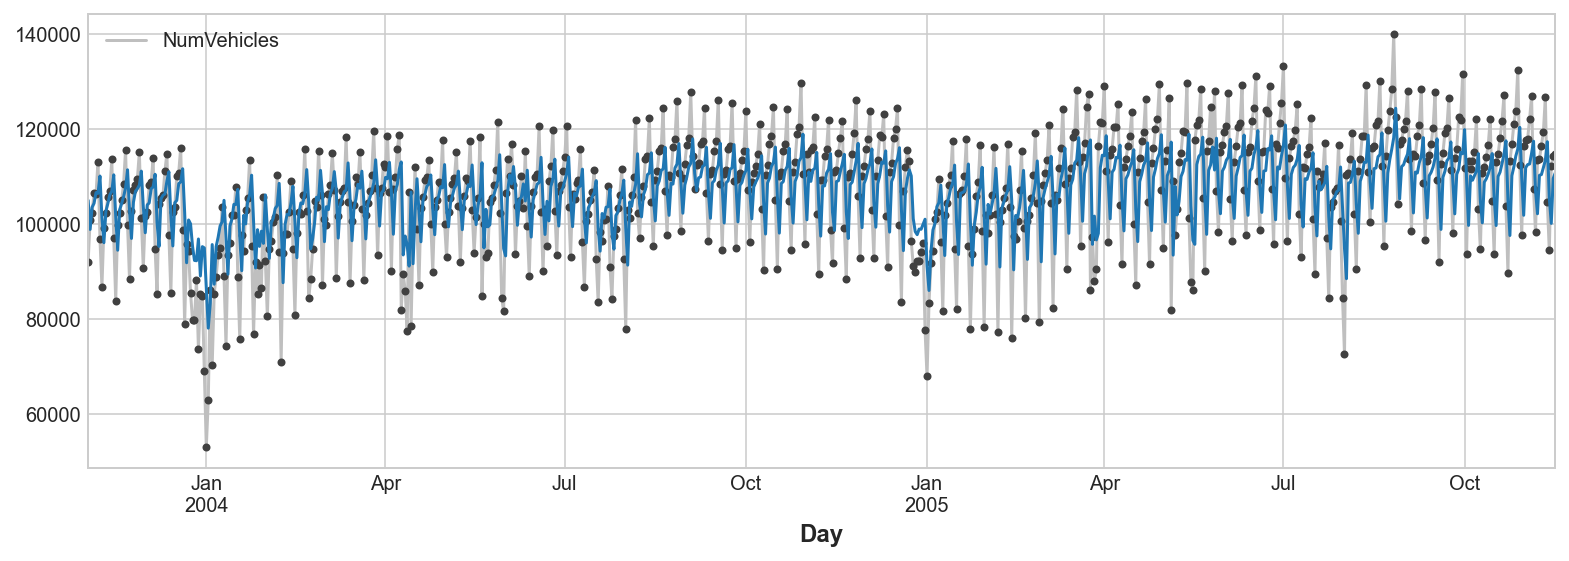

In [11]:
ax = y.plot(**plot_params)
ax = y_pred.plot()